DSCI 552 Homework 1 Zeru Zhou Github username: Zeruuuuu USCID: 9208-8181-38

# 1. Tree-Based Methods
## (a) Download the APS Failure data. The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [6]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [12]:
training = pd.read_csv('../data/aps_failure_training_set.csv', skiprows = 20)
training.head()

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698     na  2130706438    280      0      0      0      0      0   
1   neg   33058     na           0     na      0      0      0      0      0   
2   neg   41040     na         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874     na        1368    458      0      0      0      0      0   

   ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008 ee_009 ef_000  \
0  ...  1240520  493384  721044  469792  339156  157956   73224      0      0   
1  ...   421400  178064  293306  245416  133654   81140   97576   1500      0   
2  ...   277378  159812  423992  409564  320746  158022   95128    514      0   
3  ...      240      46      58      44      10       0       0      0      4   
4  ...   622012  229790  405298  347188  286954  311560  433954   1218      0   

  eg_000  
0      0  
1      0  
2      0  
3     32  
4      0  

[5 rows x 171 columns]

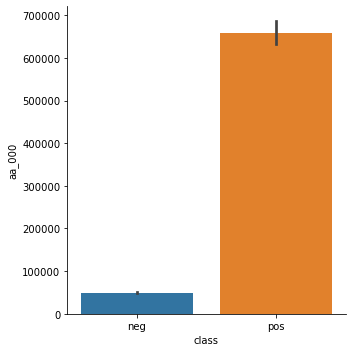

In [44]:
sns.catplot(data = training, x = 'class', y = 'aa_000', kind = 'bar')

In [19]:
pd.get_dummies(training, columns = ['class'])

aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0       76698     na  2130706438    280      0      0      0      0      0   
1       33058     na           0     na      0      0      0      0      0   
2       41040     na         228    100      0      0      0      0      0   
3          12      0          70     66      0     10      0      0      0   
4       60874     na        1368    458      0      0      0      0      0   
...       ...    ...         ...    ...    ...    ...    ...    ...    ...   
59995  153002     na         664    186      0      0      0      0      0   
59996    2286     na  2130706538    224      0      0      0      0      0   
59997     112      0  2130706432     18      0      0      0      0      0   
59998   80292     na  2130706432    494      0      0      0      0      0   
59999   40222     na         698    628      0      0      0      0      0   

      ag_003  ...   ee_004   ee_005   ee_006  ee_007  ee_008  ee_009 ef_000  \
0          0  ...   721044   469792   339156  157956   73224       0      0   
1          0  ...   293306   245416   133654   81140   97576    1500      0   
2          0  ...   423992   409564   320746  158022   95128     514      0   
3        318  ...       58       44       10       0       0       0      4   
4          0  ...   405298   347188   286954  311560  433954    1218      0   
...      ...  ...      ...      ...      ...     ...     ...     ...    ...   
59995   2564  ...  1290398  1218244  1019768  717762  898642   28588      0   
59996      0  ...    21126    68424      136       0       0       0      0   
59997      0  ...      452      144      146    2622       0       0      0   
59998      0  ...   347378   225724   194440  165070  802280  388422      0   
59999      0  ...   344546   254068   225148  158304  170384     158      0   

      eg_000 class_neg class_pos  
0          0         1         0  
1          0         1         0  
2          0         1         0  
3         32         1         0  
4          0         1         0  
...      ...       ...       ...  
59995      0         1         0  
59996      0         1         0  
59997      0         1         0  
59998      0         1         0  
59999      0         1         0  

[60000 rows x 172 columns]

In [24]:
training.isnull().values.any()

False

In [3]:
training.shape

(60000, 171)

In [4]:
training['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [5]:
test = pd.read_csv('../data/aps_failure_test_set.csv', skiprows = 20)
test.head()

class  aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  ...  \
0   neg      60      0     20     12      0      0      0      0      0  ...   
1   neg      82      0     68     40      0      0      0      0      0  ...   
2   neg   66002      2    212    112      0      0      0      0      0  ...   
3   neg   59816     na   1010    936      0      0      0      0      0  ...   
4   neg    1814     na    156    140      0      0      0      0      0  ...   

   ee_002  ee_003  ee_004  ee_005   ee_006  ee_007  ee_008 ee_009 ef_000  \
0    1098     138     412     654       78      88       0      0      0   
1    1068     276    1620     116       86     462       0      0      0   
2  495076  380368  440134  269556  1315022  153680     516      0      0   
3  540820  243270  483302  485332   431376  210074  281662   3232      0   
4    7646    4144   18466   49782     3176     482      76      0      0   

  eg_000  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 171 columns]

In [6]:
test.shape

(16000, 171)

In [7]:
test['class'].value_counts()

neg    15625
pos      375
Name: class, dtype: int64

As above, I loaded training and test datasets.

## (b) Data Preparation This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.
### i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

In [8]:
whole_set = pd.concat([training, test])
whole_set.shape

(76000, 171)

In [9]:
whole_set = whole_set.replace('na', np.nan)

In [10]:
whole_x, whole_y = whole_set.drop(columns = ['class']), whole_set['class']

In [11]:
train = training.replace('na', np.nan)
test = test.replace('na', np.nan)
train_x, train_y = train.drop(columns = ['class']), train['class']
test_x, test_y = test.drop(columns = ['class']), test['class']

In [12]:
Iter = IterativeImputer(random_state = 0, n_nearest_features = 15).fit(whole_x)

In [13]:
train_x = pd.DataFrame(Iter.transform(train_x))
test_x = pd.DataFrame(Iter.transform(test_x))

In [14]:
train_x.head()

0         1             2              3    4     5    6    7    8    \
0  76698.0  1.347232  2.130706e+09     280.000000  0.0   0.0  0.0  0.0  0.0   
1  33058.0  1.534077  0.000000e+00  151378.571438  0.0   0.0  0.0  0.0  0.0   
2  41040.0  0.542309  2.280000e+02     100.000000  0.0   0.0  0.0  0.0  0.0   
3     12.0  0.000000  7.000000e+01      66.000000  0.0  10.0  0.0  0.0  0.0   
4  60874.0  1.157442  1.368000e+03     458.000000  0.0   0.0  0.0  0.0  0.0   

     9    ...        160       161       162       163       164       165  \
0    0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0  157956.0   
1    0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   81140.0   
2    0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0  158022.0   
3  318.0  ...      240.0      46.0      58.0      44.0      10.0       0.0   
4    0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0  311560.0   

        166     167  168   169  
0   73224.0     0.0  0.0   0.0  
1   97576.0  1500.0  0.0   0.0  
2   95128.0   514.0  0.0   0.0  
3       0.0     0.0  4.0  32.0  
4  433954.0  1218.0  0.0   0.0  

[5 rows x 170 columns]

As above, I used Iterative Imputer to fill in missing values.

### ii. For each of the 170 features, calculate the coefficient of variation CV = s/m, where s is sample standard deviation and m is sample mean.

In [15]:
whole_x = pd.concat([train_x, test_x])
whole_x.shape

(76000, 170)

In [16]:
whole_x.isna().value_counts()

0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93     94     95     96     97     98     99     100    101    102    103    104    105    106    107    108    109    110    111    112    113    114    115    116    117    118    119    120    121    122    123    124    125    126    127    128    129    130    131    132    133    134    135    136    137    138    139    140    141    142   

In [17]:
CV = []
for i in whole_x.columns:
    mean = np.mean(whole_x[i])
    std = np.std(whole_x[i])
    CV.append(std/mean)

In [18]:
my_df = pd.DataFrame({'feature': whole_x.columns, 'CV': CV})
my_df

feature          CV
0          0    4.328579
1          1    2.017737
2          2    2.206303
3          3  206.786331
4          4   19.438573
..       ...         ...
165      165    4.901451
166      166    3.351126
167      167    5.786315
168      168   42.572780
169      169   38.979563

[170 rows x 2 columns]

As above, the features and corresponding CV are calculated.

### iii. Plot a correlation matrix for your features using pandas or any other tool.

In [19]:
whole_x.corr().style.background_gradient(cmap = 'coolwarm')

Here above is the correlation matrix.

### iv. Pick ⌊ 170⌋ features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [20]:
number = math.floor(math.sqrt(170))
number

13

In [21]:
cv_sort = sorted(CV, reverse = True)[0:13]
cv_sort

[207.60202855806756,
 207.11051426693538,
 206.7863307416828,
 194.0127480752246,
 127.60961814164372,
 110.51241800864659,
 103.60367611860808,
 92.57602696241403,
 85.69033493226497,
 83.42876188271572,
 80.34596188298941,
 78.4238853457796,
 75.25049651777779]

In [22]:
cv_df = pd.DataFrame()
for i in cv_sort:
    cv_df = pd.concat([cv_df, my_df.loc[my_df['CV'] == i]])
cv_df

feature          CV
91        91  207.602029
109      109  207.110514
3          3  206.786331
122      122  194.012748
134      134  127.609618
27        27  110.512418
138      138  103.603676
6          6   92.576027
19        19   85.690335
29        29   83.428762
41        41   80.345962
51        51   78.423885
18        18   75.250497

In [77]:
features = list(cv_df['feature'])

In [73]:
whole_x = pd.DataFrame(Iter.transform(whole_x))

In [79]:
selected_df = whole_x[features]
selected_df

91             109            3    122  134  27   138  6    \
0           2.000000     220.000000     280.000000  0.0  0.0  0.0  0.0  0.0   
1      150610.199703  150898.750408  151378.571438  0.0  0.0  0.0  0.0  0.0   
2           0.000000       0.000000     100.000000  0.0  0.0  0.0  0.0  0.0   
3           2.000000       2.000000      66.000000  0.0  0.0  0.0  0.0  0.0   
4           0.000000     202.000000     458.000000  0.0  0.0  0.0  0.0  0.0   
...              ...            ...            ...  ...  ...  ...  ...  ...   
75995       2.000000      42.000000     892.000000  0.0  0.0  0.0  0.0  0.0   
75996       2.000000       0.000000      46.000000  0.0  0.0  0.0  0.0  0.0   
75997       2.000000     378.000000    1518.000000  0.0  0.0  0.0  0.0  0.0   
75998       0.000000       0.000000      32.000000  0.0  0.0  0.0  0.0  0.0   
75999       0.000000       0.000000       4.000000  0.0  0.0  0.0  0.0  0.0   

       19   29   41   51     18   
0      0.0  0.0  0.0  0.0    0.0  
1      0.0  0.0  0.0  0.0   68.0  
2      0.0  0.0  0.0  0.0    0.0  
3      0.0  0.0  0.0  0.0    0.0  
4      0.0  0.0  0.0  0.0  226.0  
...    ...  ...  ...  ...    ...  
75995  0.0  0.0  0.0  0.0    0.0  
75996  0.0  0.0  0.0  0.0    0.0  
75997  0.0  0.0  0.0  0.0    0.0  
75998  0.0  0.0  0.0  0.0    0.0  
75999  0.0  0.0  0.0  0.0  472.0  

[76000 rows x 13 columns]

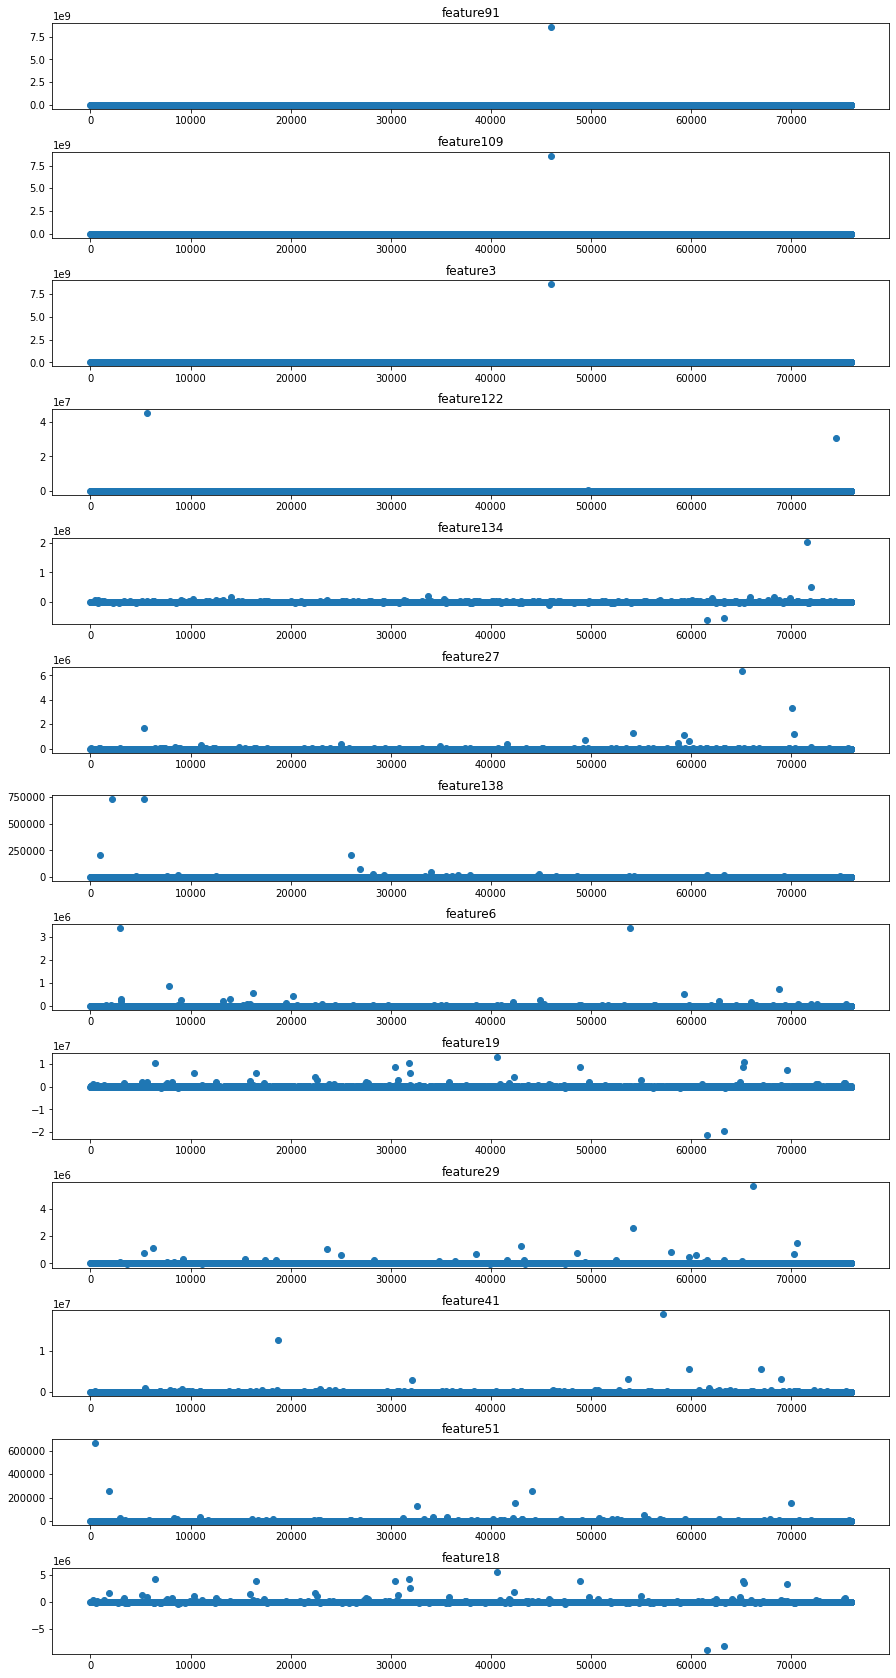

In [23]:
plt.figure(figsize = (15,30))
num = 1
for i in cv_df.feature:
    plt.subplot(13,1,num)
    plt.scatter(np.arange(76000), whole_x[i])
    plt.title('feature'+str(i))
    num += 1
plt.subplots_adjust(hspace = 0.5)

In [24]:
plt.figure(figsize = (15,30))
num = 1
for i in cv_df.feature:
    plt.subplot(13,1,num)
    plt.boxplot(whole_x[i])
    plt.title('feature'+str(i))
    num += 1
plt.subplots_adjust(hspace = 0.5)

In [80]:
sns.pairplot(data = selected_df, diag_kind = None)

<AxesSubplot:>

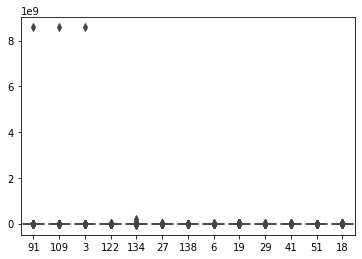

In [81]:
sns.boxplot(data = selected_df)

From the visualization, we can see that the large majority of data points in these features are centered at 0. This means it is likely that these variables are not significant. This conclusion is only observational-based, so to ensure the result, we need further tests.

### v. Determine the number of positive and negative data. Is this data set imbalanced?

In [25]:
whole_y = pd.concat([train_y, test_y])
whole_y.shape

(76000,)

In [26]:
whole_y.value_counts()

neg    74625
pos     1375
Name: class, dtype: int64

In [27]:
whole_y.value_counts(normalize = True)

neg    0.981908
pos    0.018092
Name: class, dtype: float64

As the result, more than 98% of the sample is in class "neg" and only 1.8% of the sample is in class "pos". Hence, we could say this data set is class imbalanced.

## (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

### For Test set

In [58]:
rf = RandomForestClassifier(random_state = 0, oob_score = True).fit(train_x, train_y)
y_pred = rf.predict(test_x)
cm = confusion_matrix(test_y, y_pred)
cm

array([[15606,    19],
       [  108,   267]])

In [59]:
test_y_01 = test_y.replace('neg', 0).replace('pos', 1)

In [60]:
score = rf.predict_proba(test_x)

In [61]:
fpr, tpr, thod = roc_curve(test_y_01, score[:, 1])

In [62]:
plt.figure()
plt.plot(fpr, tpr)
plt.title('ROC Curve for Test Set')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Text(0, 0.5, 'True Positive Rate')

In [63]:
AUC = auc(fpr, tpr)
print(f'AUC score is {AUC}')

AUC score is 0.9927812266666667


In [64]:
accuracy = accuracy_score(test_y, y_pred)
misclassfication_rate = 1 - accuracy
print(f'misclassfication rate is {misclassfication_rate}')

misclassfication rate is 0.007937500000000042


### For Training set

In [65]:
y_pred_train = rf.predict(train_x)
cm = confusion_matrix(train_y, y_pred_train)
cm

array([[59000,     0],
       [    0,  1000]])

In [66]:
train_y_01 = train_y.replace('neg', 0).replace('pos', 1)
score_train = rf.predict_proba(train_x)
fpr, tpr, thod = roc_curve(train_y_01, score_train[:, 1])

Text(0, 0.5, 'True Positive Rate')

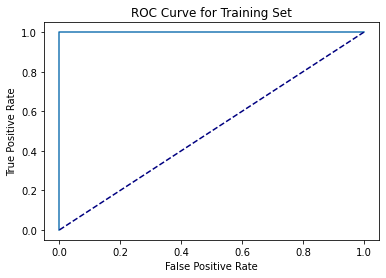

In [67]:
plt.figure()
plt.plot(fpr, tpr)
plt.title('ROC Curve for Training Set')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [68]:
AUC = auc(fpr, tpr)
print(f'AUC score is {AUC}')

AUC score is 0.9999999999999999


In [69]:
accuracy = accuracy_score(train_y, y_pred_train)
misclassfication_rate = 1 - accuracy
print(f'misclassfication rate is {misclassfication_rate}')

misclassfication rate is 0.0


### OOB

In [70]:
rf.oob_score_

0.9940666666666667

In [71]:
oob_error = 1 - rf.oob_score_
oob_error

0.005933333333333346

We can find that oob error is 0.0059, and test error is 0.0079, so oob error is smaller than test error.

## (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c.

In [83]:
smote = SMOTE(random_state = 0)

In [84]:
train_x_sm, train_y_sm = smote.fit_resample(train_x, train_y)

### For Test set

In [85]:
rf = RandomForestClassifier(random_state = 0, oob_score = True).fit(train_x_sm, train_y_sm)
y_pred = rf.predict(test_x)
cm = confusion_matrix(test_y, y_pred)
cm

array([[15543,    82],
       [   66,   309]])

In [86]:
test_y_01 = test_y.replace('neg', 0).replace('pos', 1)
score = rf.predict_proba(test_x)
fpr, tpr, thod = roc_curve(test_y_01, score[:, 1])

In [87]:
plt.figure()
plt.plot(fpr, tpr)
plt.title('ROC Curve for Test Set')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Text(0, 0.5, 'True Positive Rate')

In [88]:
AUC = auc(fpr, tpr)
print(f'AUC score is {AUC}')

AUC score is 0.9928727039999999


In [89]:
accuracy = accuracy_score(test_y, y_pred)
misclassfication_rate = 1 - accuracy
print(f'misclassfication rate is {misclassfication_rate}')

misclassfication rate is 0.00924999999999998


### For Training Set

In [90]:
y_pred_train = rf.predict(train_x)
cm = confusion_matrix(train_y, y_pred_train)
cm

array([[59000,     0],
       [    0,  1000]])

In [91]:
train_y_01 = train_y.replace('neg', 0).replace('pos', 1)
score_train = rf.predict_proba(train_x)
fpr, tpr, thod = roc_curve(train_y_01, score_train[:, 1])

Text(0, 0.5, 'True Positive Rate')

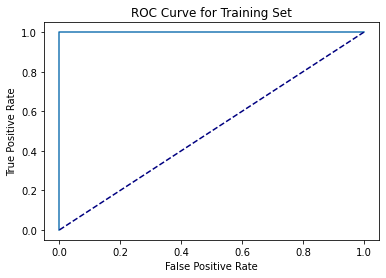

In [92]:
plt.figure()
plt.plot(fpr, tpr)
plt.title('ROC Curve for Training Set')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [93]:
AUC = auc(fpr, tpr)
print(f'AUC score is {AUC}')

AUC score is 1.0


In [94]:
accuracy = accuracy_score(train_y, y_pred_train)
misclassfication_rate = 1 - accuracy
print(f'misclassfication rate is {misclassfication_rate}')

misclassfication rate is 0.0


### OOB

In [95]:
rf.oob_score_

0.9967542372881356

In [96]:
oob_error = 1 - rf.oob_score_
oob_error

0.003245762711864386

Class imbalance is addressed in Random Forest because random forest use bootstrap to copy many training sets. If the randomly selected bootstrap set does not contain a certain class, that decision tree will be ruined. We can find that the misclassfication rate(test error) increased a 0.002 but it is trivial, and type 1 & type 2 error is more balanced. The OOB error decreased 0.002 as well, after implemented smote.

## (e) XGBoost and Model Trees
### In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has 􏰀j βjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node. One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.


In [109]:
param = {'reg_alpha': np.linspace(0.001,3, num = 10)}

In [110]:
xgb = XGBClassifier(eta = 0.01, objective = 'binary:logistic')

In [111]:
gs = GridSearchCV(xgb, param).fit(train_x, train_y_01)

In [116]:
clf = gs.best_estimator_
clf.get_params()['reg_alpha']

0.33422222222222225

In [123]:
cross_val_score = gs.cv_results_['mean_test_score'][1]
cross_val_score

0.9920333333333333

In [125]:
cross_error = 1 - cross_val_score
print(f'cross validation error is {cross_error}')

cross validation error is 0.007966666666666677


In [126]:
y_pred = clf.predict(test_x)
score = accuracy_score(test_y_01, y_pred)
score

0.990125

In [127]:
test_error = 1 - score
print(f'test error is {test_error}')

test error is 0.009874999999999967


### For Test Set

In [129]:
cm = confusion_matrix(test_y_01, y_pred)
cm

array([[15604,    21],
       [  137,   238]])

In [130]:
score = clf.predict_proba(test_x)
fpr, tpr, thod = roc_curve(test_y_01, score[:, 1])

Text(0, 0.5, 'True Positive Rate')

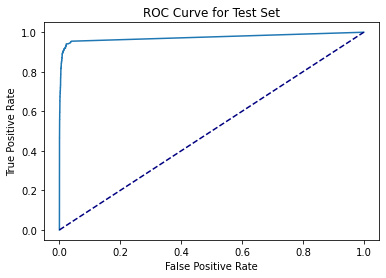

In [131]:
plt.figure()
plt.plot(fpr, tpr)
plt.title('ROC Curve for Test Set')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [132]:
AUC = auc(fpr, tpr)
print(f'AUC score is {AUC}')

AUC score is 0.9738449066666667


### For Training Set

In [133]:
y_pred_train = clf.predict(train_x)
cm = confusion_matrix(train_y_01, y_pred_train)
cm

array([[58953,    47],
       [  291,   709]])

In [136]:
score_train = clf.predict_proba(train_x)
fpr, tpr, thod = roc_curve(train_y_01, score_train[:, 1])

Text(0, 0.5, 'True Positive Rate')

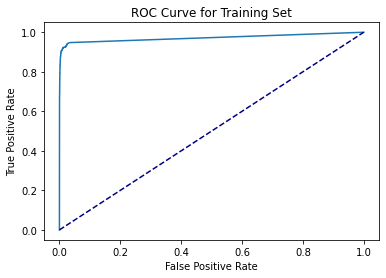

In [137]:
plt.figure()
plt.plot(fpr, tpr)
plt.title('ROC Curve for Training Set')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [138]:
AUC = auc(fpr, tpr)
print(f'AUC score is {AUC}')

AUC score is 0.9717239491525423


As above, the ROC, confusion matrix, AUC are reported. The CV error for the trained model is 0.0079, and the test error is 0.0099. The cross validation error is less than the test error.

## (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train XGBosst with L1-penalized logistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.

In [148]:
param = {'model__reg_alpha': np.linspace(0.001,3, num = 20)}

In [149]:
pipe = Pipeline(steps = [('smote', smote), ('model', xgb)])

In [150]:
grid_search = GridSearchCV(pipe, param).fit(train_x, train_y_01)

In [151]:
clf = grid_search.best_estimator_

In [154]:
clf.get_params()['model__reg_alpha']

0.9480526315789474

In [155]:
cv_score = grid_search.cv_results_['mean_test_score'][6]
print(f'cross validation error is {1 - cv_score}')

cross validation error is 0.027850000000000152


In [156]:
y_pred = clf.predict(test_x)
accuracy = accuracy_score(test_y_01, y_pred)
print(f'test error is {1 - accuracy}')

test error is 0.02849999999999997


### For Test Set

In [157]:
cm = confusion_matrix(test_y_01, y_pred)
cm

array([[15208,   417],
       [   39,   336]])

In [158]:
score = clf.predict_proba(test_x)
fpr, tpr, thod = roc_curve(test_y_01, score[:, 1])

Text(0, 0.5, 'True Positive Rate')

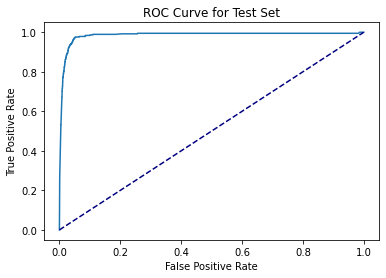

In [159]:
plt.figure()
plt.plot(fpr, tpr)
plt.title('ROC Curve for Test Set')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [160]:
AUC = auc(fpr, tpr)
print(f'AUC score is {AUC}')

AUC score is 0.9844796586666666


### For Training Set

In [161]:
y_pred_train = clf.predict(train_x)
cm = confusion_matrix(train_y_01, y_pred_train)
cm

array([[57431,  1569],
       [   44,   956]])

In [162]:
score_train = clf.predict_proba(train_x)
fpr, tpr, thod = roc_curve(train_y_01, score_train[:, 1])

Text(0, 0.5, 'True Positive Rate')

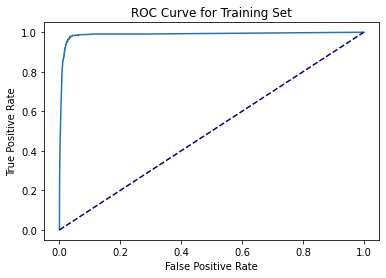

In [163]:
plt.figure()
plt.plot(fpr, tpr)
plt.title('ROC Curve for Training Set')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [164]:
AUC = auc(fpr, tpr)
print(f'AUC score is {AUC}')

AUC score is 0.9884977118644069


As above, step(e) is repeated. The ROC, AUC, and confusion matrix are displayed. The CV error is 0.027 and test error is 0.028, which are approximately the same. Compare to the case without SMOTE, both CV error and test error increased here when we implemented SMOTE. Looking at the confusion matrix, we can see that type I error drops when we implemented SMOTE, but type II error significantly increased after we used SMOTE.

# ISLR 6.6.3

### (a) As we increase s from 0, the training RSS will:

The training RSS will steadily decrease. When s increases from 0, we are lossing the restriction on βj coefficients. This loss of restriction will make the model becoming more and more flexible. As the model becomes flexible, it tends to fit more tightly on training data, which makes training RSS steadily decrease.

### (b) Repeat (a) for test RSS.

The test RSS will decrease initially, and then eventually start increasing in a U shape. This is because as we increase s, we loss the restriction in coefficients, making the model more and more flexible. This will initially make the model better fit for test set, making the test RSS to decrease. Then it will overfit the training set since we put less and less restrictions. As the overfitting happens, the test RSS will eventually start increasing in a U shape.

### (c) Repeat (a) for variance.

The variance will steadily increase because as we loss the restriction on coefficients, we are decreasing the bias of the model. According to bias variance tradeoff, as the bias steadily decreasing, the variance will steadily increase.

### (d) Repeat (a) for (squared) bias.

The squared bias will steadily decrease. This is because as we loss the restriction on coefficients, the model will be more flexible, hence we fit more tightly to the training data. Hence, we are decreasing the bias of the model.

### (e) Repeat (a) for the irreducible error.

The irreducible error will remain the same because irreducible error is independent to the model, so it is independent to the value of s as well.

# ISLR, 6.6.5

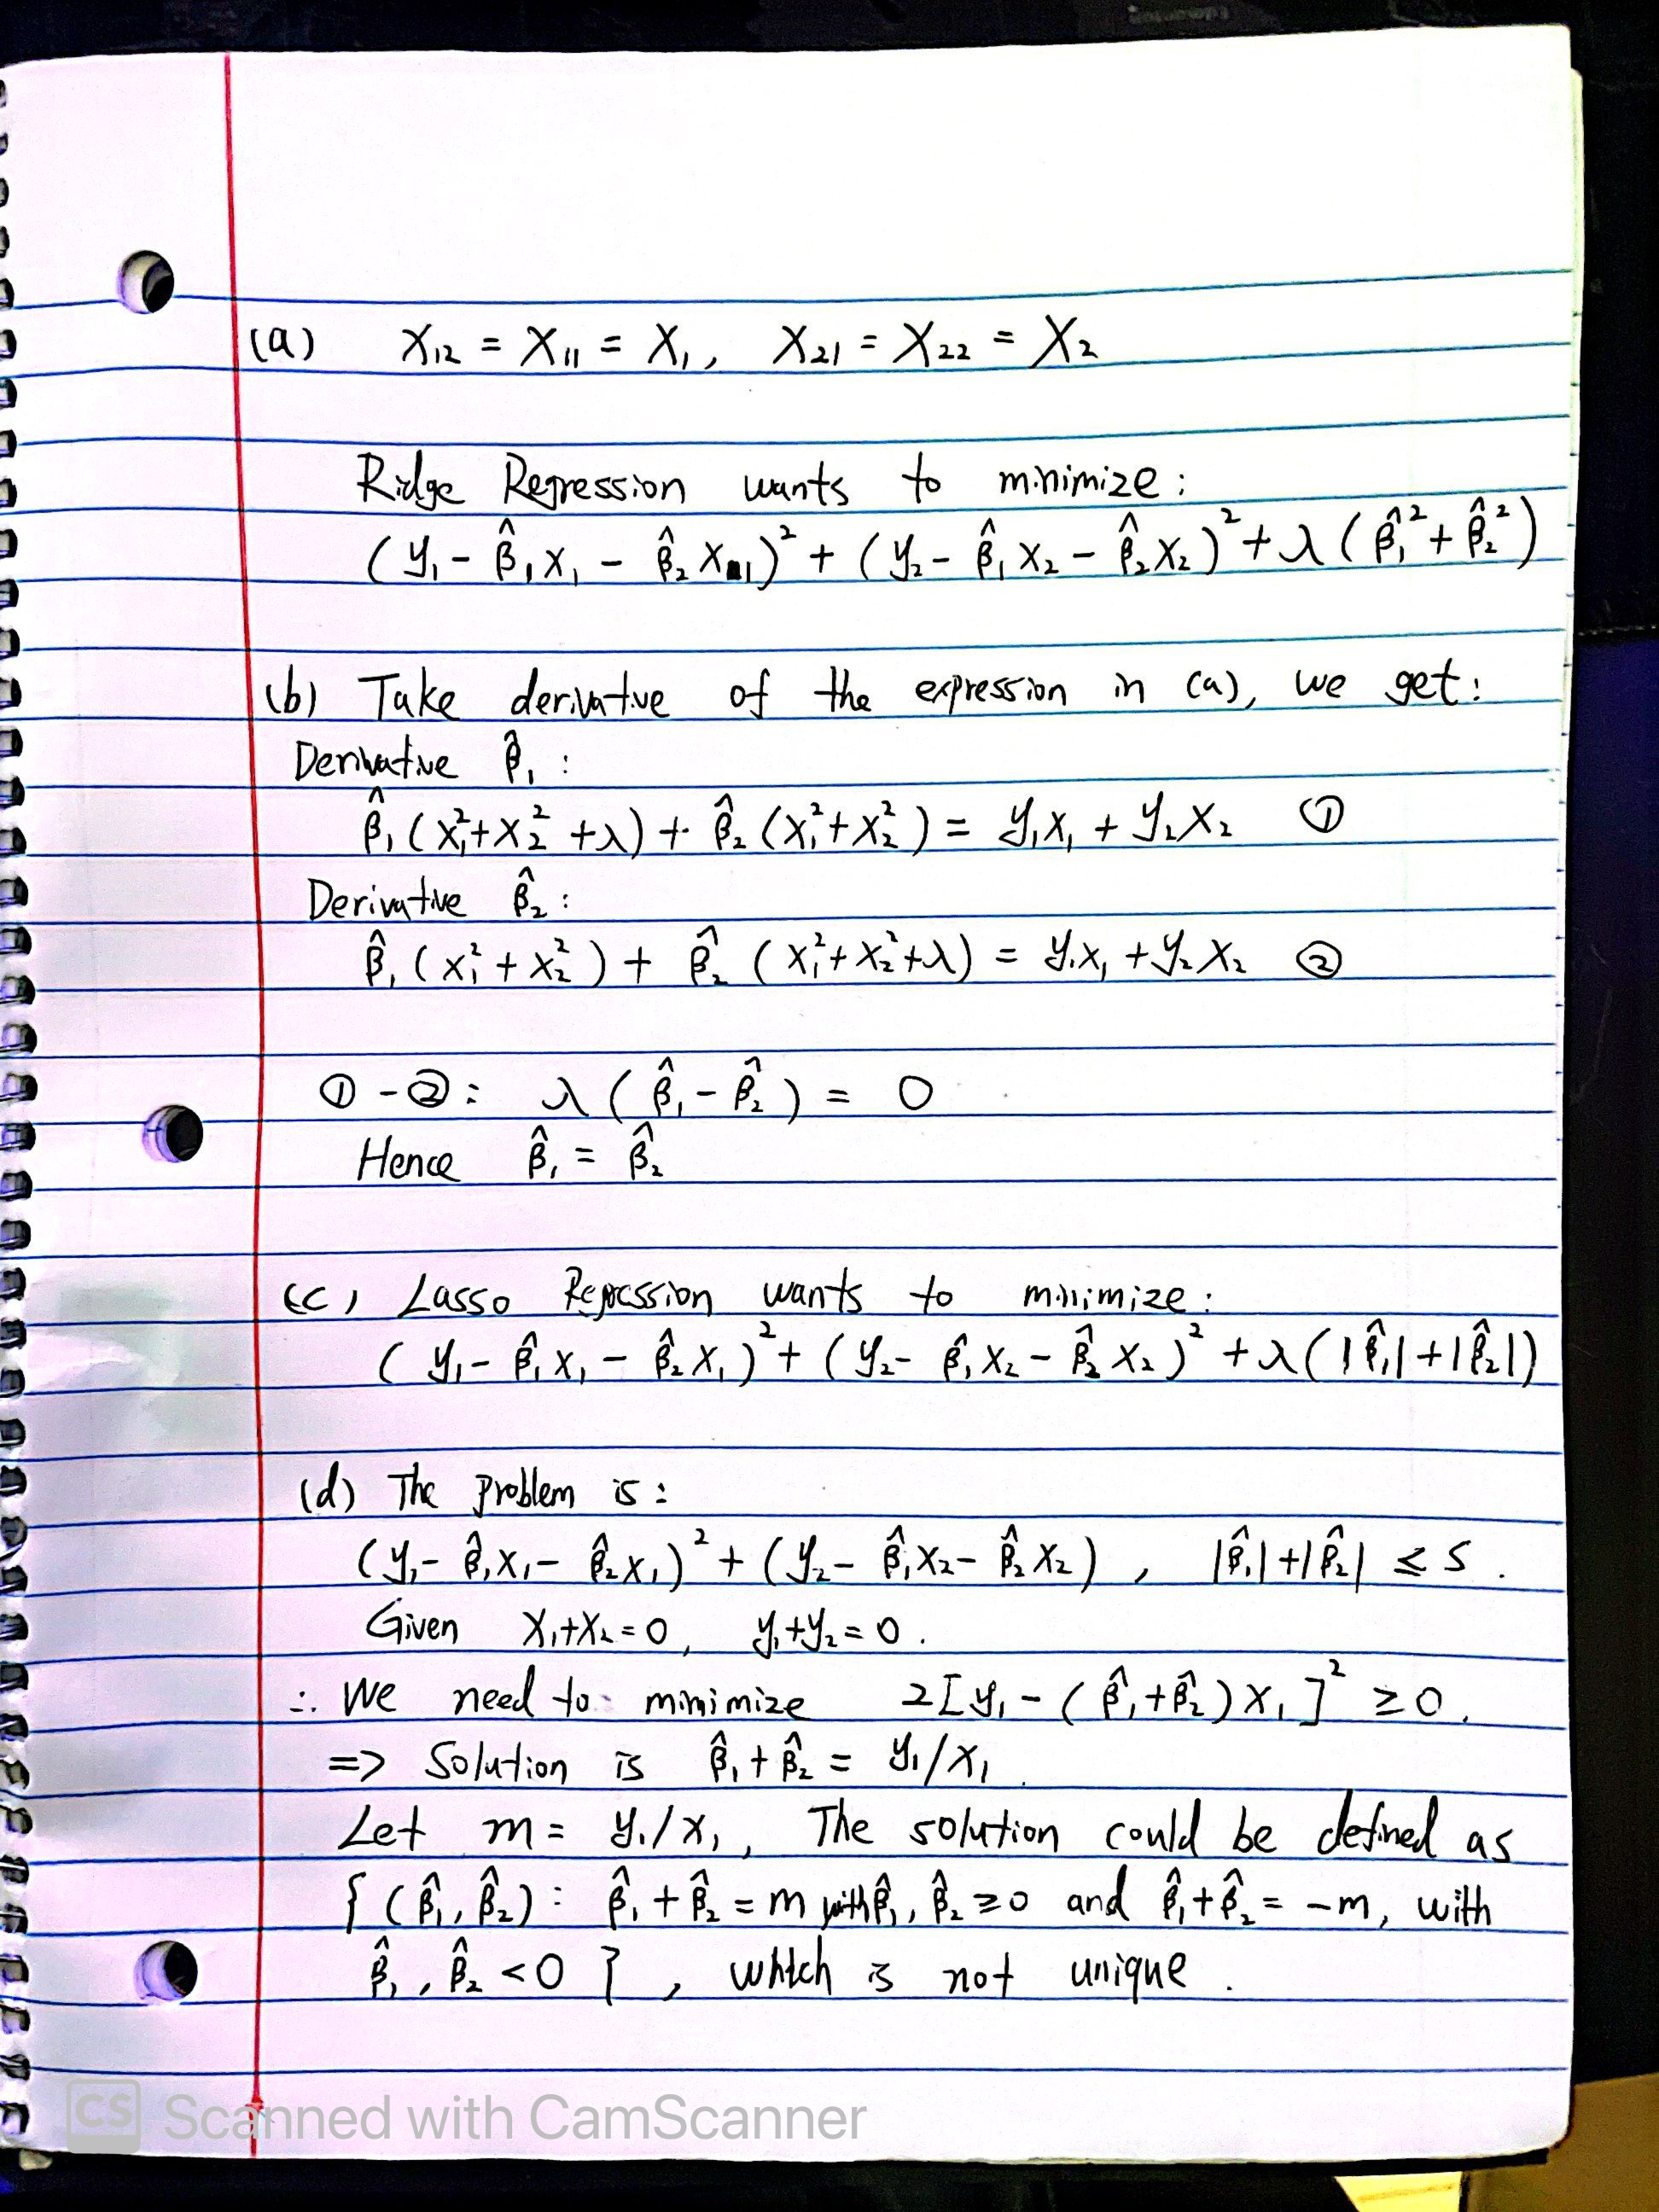

# ISLR 8.4.5

Majority Polling: There are 6 red cases and 4 green cases. Hence the final classification is Red.
Take Mean Probability: The mean probability is 0.45 < 0.5. Hence the final classification is Green.

# ISLR 9.7.3

### (a) Sketch the observations.

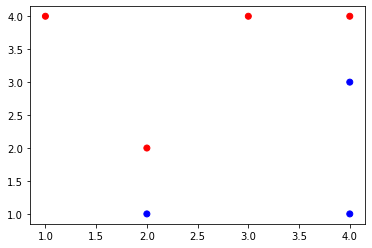

In [171]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
colors = ["red", "red", "red", "red", "blue", "blue", "blue"]
plt.figure()
plt.scatter(x1, x2, color = colors)

### (b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane

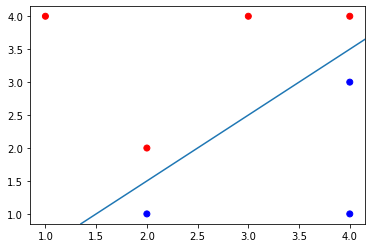

In [179]:
x_1 = (2, 1.5)
x_2 = (4, 3.5)
plt.figure()
plt.scatter(x1, x2, color = colors)
plt.axline(x_1, x_2)

The hyperplane is defined by four points: (2,1), (2,2), (4,3) and (4,4). So it is a line that passes (2,1.5) and (4,3.5). Equation is X1−X2−0.5=0

### (c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.

The classification rule is classify to Red if X1−X2−0.5<0, and classify to Blue otherwise. β0 is -0.5, β1 is 1, and β2 is -1.

### (d) On your sketch, indicate the margin for the maximal margin hyperplane.

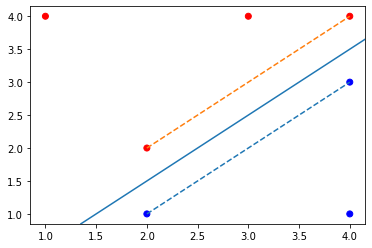

In [182]:
plt.figure()
plt.scatter(x1, x2, color = colors)
plt.plot((2,4), (1,3), '--')
plt.plot((2,4), (2,4), '--')
plt.axline(x_1, x_2)

As you can see, the margin is defined by the distance from the hyperplane to the nearest data point(the dash line).

### (e) Indicate the support vectors for the maximal margin classifier.

The support vectors are (2,1), (2,2), (4,3) and (4,4).

### (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

The 7th data point is (4,1), which is far from hyperplane and is not a support vector. Non-support vector's move will not affect the maximal margin hyperplane.

### (g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

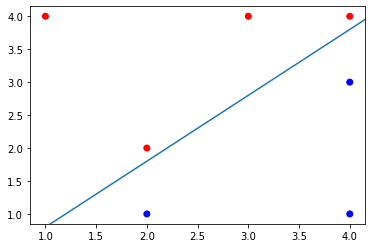

In [183]:
x_1 = (2, 1.8)
x_2 = (4, 3.8)
plt.figure()
plt.scatter(x1, x2, color = colors)
plt.axline(x_1, x_2)

The hyperplane above is not the optimized since its margin is not maximized. The equation is X1−X2−0.2 = 0

### (h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

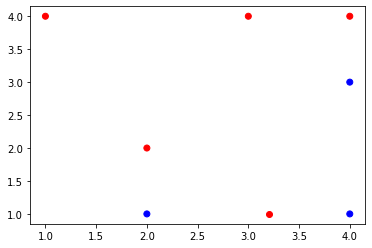

In [184]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
colors = ["red", "red", "red", "red", "blue", "blue", "blue"]
plt.figure()
plt.scatter(x1, x2, color = colors)
plt.scatter(3.2, 1, color = 'red')

As above, I added a (3.2,1) red point to make hyperplane no longer seperate the two classes.